<a href="https://colab.research.google.com/github/realover82/AINFT-Lab/blob/master/220616%EA%B0%90%EC%9E%90_ver4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
cd 

/root


In [4]:
cd ..

/


In [5]:
cd /content/drive/MyDrive/deeplearning

/content/drive/MyDrive/deeplearning


In [7]:
import numpy as np  
import datetime
import tensorflow as tf
from tensorflow.keras.applications.vgg19 import VGG19
from tensorflow.keras.layers import  Flatten, Dense, Dropout
from tensorflow.keras import Model
from keras.preprocessing.image import ImageDataGenerator
import matplotlib.pyplot as plt

In [8]:
BATCH_SIZE = 32
COLOR_MODE = 'rgb'
TARGET_SIZE = (255, 255)
GRAY_SCALL = (3,)
INPUT_SIZE = TARGET_SIZE + GRAY_SCALL

def my_model():
  vgg19_model = VGG19(weights='imagenet',include_top=False,input_shape=INPUT_SIZE)
  vgg19_model.trainable = False
  flatten =Flatten()(vgg19_model.layers[-1].output)
  fc1 = Dense(units=4096, activation ='relu')(flatten)
  dropout = Dropout(0.2)(fc1)
  fc2 = Dense(units=1024,activation='relu')(dropout)
  output = Dense(2, activation='softmax')(fc2)
  model = Model(inputs = vgg19_model.input, outputs=output)
  model.summary()
  return model

In [9]:
model = my_model()

80150528/80134624 [==============================] - 0s 0us/step
Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 255, 255, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 255, 255, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 255, 255, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 127, 127, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 127, 127, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 127, 127, 128)     147584    
                                                              

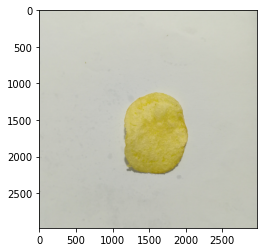

In [10]:
img = tf.io.read_file("IMG_20210318_232548.jpg")
tensor = tf.io.decode_image(img, channels=3, dtype=tf.dtypes.float32)
plt.imshow(tensor)

In [11]:
model = tf.keras.models.load_model('my_model-p4-8.h5')

In [12]:
CLASSES = ['Defective','Non-Defective']

tensor = tf.image.resize(tensor, [255, 255])
tensor = tensor / 255.0
input_tensor = tf.expand_dims(tensor, axis=0)

logit = model(input_tensor)
pred = tf.math.argmax(logit, axis=1, output_type=tf.dtypes.int64)

print(CLASSES[pred[0]])
print(pred)
print(logit)
# print(tensor)
# print(input_tensor)

Non-Defective
tf.Tensor([1], shape=(1,), dtype=int64)
tf.Tensor([[0.24890615 0.7510938 ]], shape=(1, 2), dtype=float32)


In [15]:
    img = tf.keras.preprocessing.image.load_img("IMG_20210318_232548.jpg", target_size=(255,255,3))
    img = np.asarray(img)
    img = np.expand_dims(img, axis=0)
    output = model.predict(img)

In [17]:
print(output)

[[9.9999893e-01 1.0920006e-06]]
